In [2]:
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [3]:
housing = fetch_openml(name="house_prices", as_frame=True)
df = housing.frame

In [5]:
X = df[['OverallQual', 'GrLivArea']]
y = df['SalePrice']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [7]:
dt_reg = DecisionTreeRegressor(max_depth=3, random_state=42)
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [9]:
y_pred = dt_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f"Test RMSE (Root Mean Squared Error): ${rmse:,.2f}")

Test RMSE (Root Mean Squared Error): $43,563.90


In [10]:
print("--- Decision Tree Regressor on Ames Housing (Max Depth 3) ---")
print(f"Test RMSE (Root Mean Squared Error): ${rmse:,.2f}")
print("\nModel trained using iterative binary (2-way) splits.")

--- Decision Tree Regressor on Ames Housing (Max Depth 3) ---
Test RMSE (Root Mean Squared Error): $43,563.90

Model trained using iterative binary (2-way) splits.


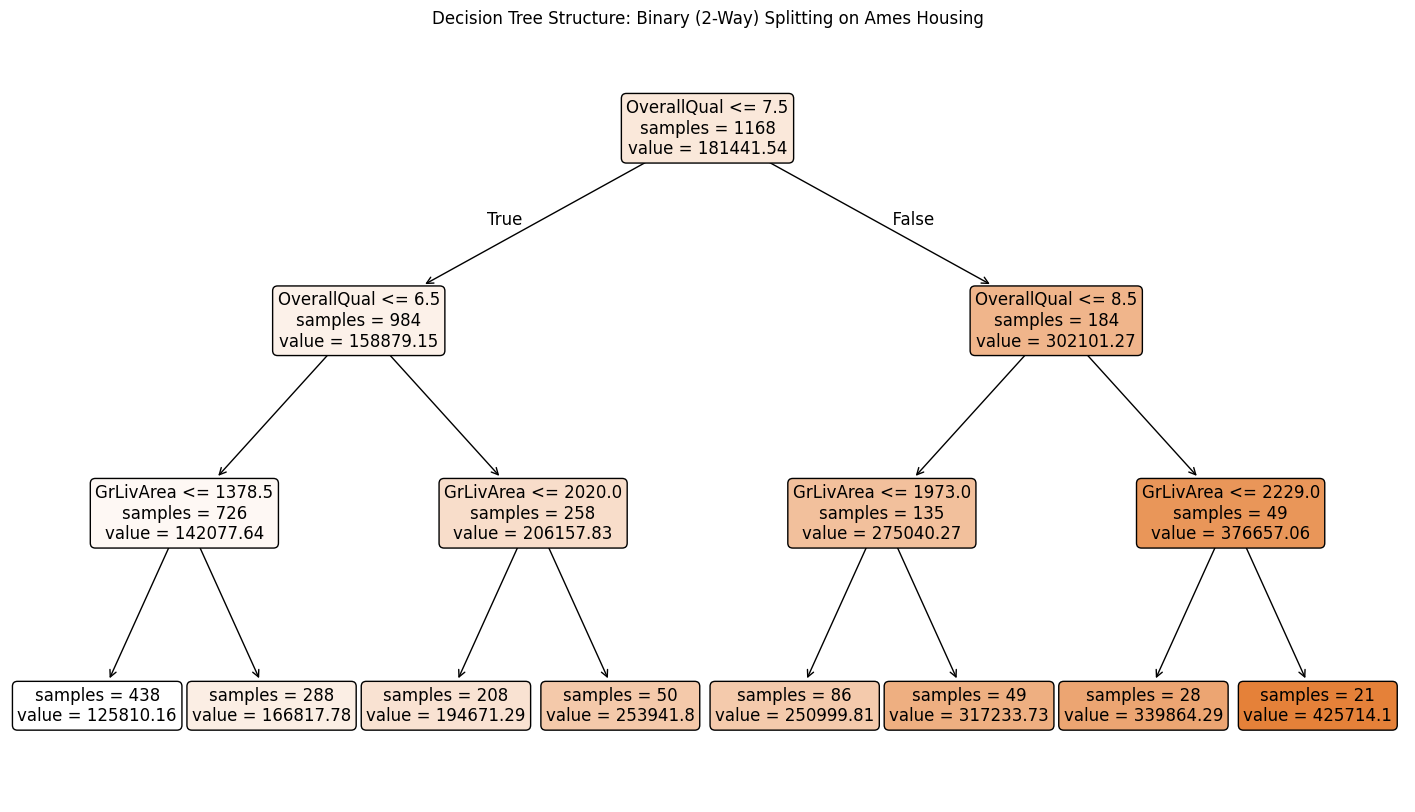

In [11]:
plt.figure(figsize=(18, 10))
plot_tree(
    dt_reg,
    feature_names=X.columns.tolist(),
    filled=True,
    rounded=True,
    fontsize=12,
    impurity=False,
    precision=2
)
plt.title("Decision Tree Structure: Binary (2-Way) Splitting on Ames Housing")
plt.show()